# CURSO TELEDETECCIÓN USANDO PYTHON

EJERCICIOS LECCION 3

- 1. CALCULO DEL NDVI 

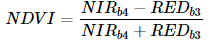

Donde,

- NIR  es la reflectancia del infrarrojo cercano b4 para TM/ETM+, b5 para OLI
- RED  es la reflectancia del infrarrojo cercano b3 para TM/ETM+, b4 para OLI
- El rango de valores del NDVI esta entre  −1  a  1 

In [6]:
import pandas as pd
import gdal
import numpy as np
import time, os, glob
%matplotlib inline
from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show

- Ruta del directorio utilizado y se cargan las bandas para el cálculo de Indices.

In [16]:
path_b2 = "C:\\Users\\Mazus\\Desktop\\Teledeteccion\\Leccion3\\LC08_L1TP_034032_20160707_20170221_01_T1_sr_band2_crop.tif"
path_b3 = "C:\\Users\\Mazus\\Desktop\\Teledeteccion\\Leccion3\\LC08_L1TP_034032_20160707_20170221_01_T1_sr_band3_crop.tif"
path_b4 = "C:\\Users\\Mazus\\Desktop\\Teledeteccion\\Leccion3\\LC08_L1TP_034032_20160707_20170221_01_T1_sr_band4_crop.tif"
path_b5 = "C:\\Users\\Mazus\\Desktop\\Teledeteccion\\Leccion3\\LC08_L1TP_034032_20160707_20170221_01_T1_sr_band5_crop.tif"
path_b6 = "C:\\Users\\Mazus\\Desktop\\Teledeteccion\\Leccion3\\LC08_L1TP_034032_20160707_20170221_01_T1_sr_band6_crop.tif"
path_b7 = "C:\\Users\\Mazus\\Desktop\\Teledeteccion\\Leccion3\\LC08_L1TP_034032_20160707_20170221_01_T1_sr_band7_crop.tif"

blue_img  = rasterio.open(path_b2)
green_img = rasterio.open(path_b3)
red_img   = rasterio.open(path_b4)
nir_img   = rasterio.open(path_b5)
swir1_img = rasterio.open(path_b6)
swir2_img = rasterio.open(path_b7)

Text(0, 0.5, 'Row #')

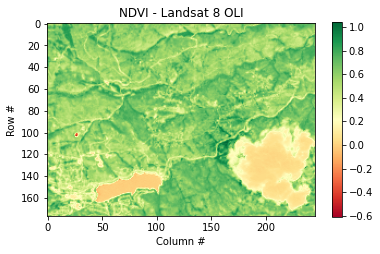

In [39]:
# Definimos la función
def fun_ndvi(red, nir):
    '''Calculamos NDVI'''
    # Convertimos a array
    red = red.read(1)
    nir = nir.read(1)
    # Convertirmos a float
    red = red.astype('f4')
    nir = nir.astype('f4')
    # Ecuacion del NDVI
    ndvi = (nir - red)/(nir + red)
    return ndvi
# Ejecutamos la función
ndvi = fun_ndvi(red_img, nir_img) # Pasamos las bandas

# Ploteamos el índice
plt.figure(figsize=(6,6))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(shrink=0.6)
plt.title('NDVI - Landsat 8 OLI')
plt.xlabel('Column #')
plt.ylabel('Row #')

- 2. CALCULO DEL SAVI
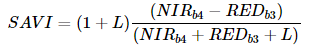
Donde,

- NIR  es la reflectancia del infrarrojo cercano b4 para TM/ETM+, b5 para OLI
- RED  es la reflectancia del infrarrojo cercano b3 para TM/ETM+, b4 para OLI
- L  funciona como el factor de ajuste del suelo
- El rango de valores del SAVI esta entre  −1  a  1 .

Text(0, 0.5, 'Row #')

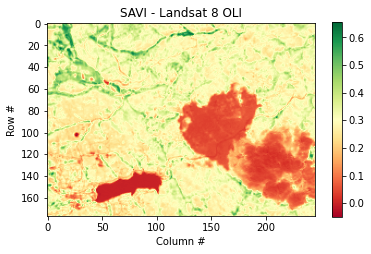

In [40]:
# Definimos la función
def fun_savi(red, nir):
    '''Calculamos SAVI'''
    # Convertimos a array
    red = red.read(1)/10000
    nir = nir.read(1)/10000
    # Convertirmos a float
    red = red.astype('f4')
    nir = nir.astype('f4')
    # Ecuacion del SAVI
    savi = 1.5*(nir - red)/(nir + red + 0.5)
    return savi
# Ejecutamos la función
savi = fun_savi(red_img, nir_img) # Pasamos las bandas
# Ploteamos el índice
plt.figure(figsize=(6,6))
plt.imshow(savi, cmap='RdYlGn')
plt.colorbar(shrink=0.6)
plt.title('SAVI - Landsat 8 OLI')
plt.xlabel('Column #')
plt.ylabel('Row #')

- CALCULO DEL EVI

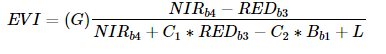
Donde,

- NIR  es la reflectancia del infrarrojo cercano b4 para TM/ETM+, b5 para OLI
- RED  es la reflectancia del infrarrojo cercano b3 para TM/ETM+, b4 para OLI
- BLUE  es la reflectancia azul b1 para TM/ETM+, b2 para OLI
- G  es el factor de ganancia
- C1 ,  C2  son los coeficientes del término de resistencia a aerosoles, que utiliza la banda azul para corregir las influencias de aerosoles en la banda roja y  L  funciona como el factor de ajuste del suelo
- El rango de valores del EVI esta entre  −1  a  1 .


Text(0, 0.5, 'Row #')

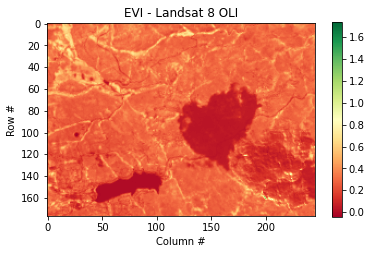

In [41]:
# Definimos la función
def fun_evi(blue, red, nir):
    '''Calculamos EVI'''
    # Convertimos a array
    blue = blue.read(1)/10000
    red = red.read(1)/10000
    nir = nir.read(1)/10000
    # Convertirmos a float
    blue = blue.astype('f4')
    red = red.astype('f4')
    nir = nir.astype('f4')
    # Ecuacion del EVI
    evi = 2.5*(nir - red)/(nir + 6*red-7.5*blue + 1)
    return evi
# Ejecutamos la función
evi = fun_evi(blue_img, red_img, nir_img) # Pasamos las bandas

# Ploteamos el índice
plt.figure(figsize=(6,6))
plt.imshow(evi, cmap='RdYlGn')
plt.colorbar(shrink=0.6)
plt.title('EVI - Landsat 8 OLI')
plt.xlabel('Column #')
plt.ylabel('Row #')

- CALCULO DEL NDWI
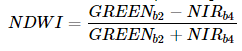
Donde,

- GREEN  es la reflectancia del verde b2 para TM/ETM+, b3 para OLI
- NIR  es la reflectancia del infrarrojo cercano b4 para TM/ETM+, b5 para OLI
- El rango de valores del NDWI esta entre  −1  a  1 .


Text(0, 0.5, 'Row #')

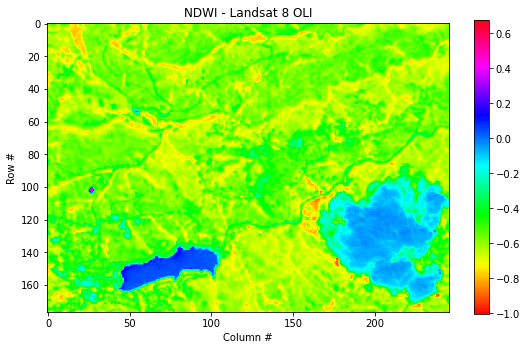

In [42]:
# Definimos la función
def fun_ndwi(green, nir):
    '''Calculamos NDWI'''
    # Convertimos a array
    green = green.read(1)
    nir = nir.read(1)
    # Convertirmos a float
    green = green.astype('f4')
    nir = nir.astype('f4')
    # Ecuacion del NDWI
    ndwi = (green - nir)/(green + nir)
    return ndwi
# Ejecutamos la función
ndwi = fun_ndwi(green_img, nir_img) # Pasamos las bandas

# Ploteamos el índice
plt.figure(figsize=(9,9))
plt.imshow(ndwi, cmap='hsv')
plt.colorbar(shrink=0.6)
plt.title('NDWI - Landsat 8 OLI')
plt.xlabel('Column #')
plt.ylabel('Row #')

- CALCULO DEL NBR
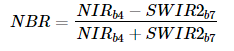
Donde,

- NIRb4  es la reflectancia del infrarrojo cercano b4 para TM/ETM+, b5 para OLI.
- SWIR2b7  es la reflectancia del infrarrojo de onda corta b7 para TM/ETM+, OLI.
- El rango de valores del NBR esta entre  −1  a  1 .

In [19]:
# Cargamos las bandas para el cálculo de los diversos índices
path_img = "RT_LC08_L1TP_014054_20180327_20180404_01_T1_Bstack_raster.tif"
stack_img  = rasterio.open(path_img)
print(stack_img.count)

6


Text(0, 0.5, 'Row #')

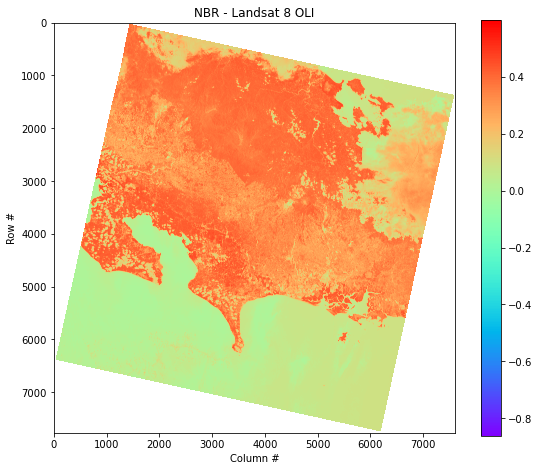

In [46]:
# Definimos la función
def fun_nbr(stack_img):
    '''Calculamos NBR'''
    # Convertimos a array
    nir = stack_img.read(5) # nir band
    swir2 = stack_img.read(6) # swir2 band
    # Convertirmos a float
    nir = nir.astype('f4')
    swir2 = swir2.astype('f4')
    # Ecuacion del NBR
    nbr = (nir - swir2)/(nir + swir2)
    return nbr
# Ejecutamos la función
nbr = fun_nbr(stack_img) # Pasamos las bandas

# Ploteamos el índice
plt.figure(figsize=(9,9))
plt.imshow(nbr, cmap='rainbow')
plt.colorbar(shrink=0.85)
plt.title('NBR - Landsat 8 OLI')
plt.xlabel('Column #')
plt.ylabel('Row #')
#np.seterr(divide='ignore', invalid='ignore')

- CALCULO DEL NDSI
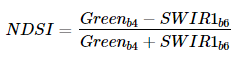

Donde,

- Greenb3  es la reflectancia green b3 para OLI
- SWIRb6  es la reflectancia del infrarrojo de onda corta b6 para OLI
- El rango de valores del NBR esta entre  −1  a  1 .

In [49]:
# Cargamos las bandas para el cálculo de los diversos índices
path_img = "RT_LC08_L1TP_014054_20180327_20180404_01_T1_Bstack_raster.tif"
stack_img  = rasterio.open(path_img)
print(stack_img.count)

6


Text(0, 0.5, 'Row #')

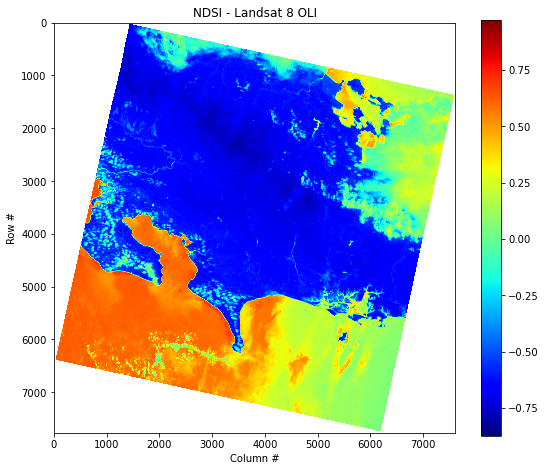

In [52]:
# Definimos la función
def fun_ndsi(stack_img):
    '''Calculamos NDSI'''
    # Convertimos a array
    green = stack_img.read(1) # green
    swir1 = stack_img.read(5) # swir1
    # Convertirmos a float
    green = green.astype('f4')
    swir1 = swir1.astype('f4')
    # Ecuacion del NDSI
    ndsi = (green - swir1)/(green + swir1)
    return ndsi
# Ejecutamos la función
ndsi = fun_ndsi(stack_img) # Pasamos las bandas

# Ploteamos el índice
plt.figure(figsize=(9,9))
plt.imshow(ndsi, cmap='jet')
plt.colorbar(shrink=0.85)
plt.title('NDSI - Landsat 8 OLI')
plt.xlabel('Column #')
plt.ylabel('Row #')